<a href="https://colab.research.google.com/github/thfruchart/tnsi/blob/main/11/COURS_Parcourir_Graphes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problèmes posés

Dans un graphe, certaines questions simples doivent pouvoir être traitées (et programmées!)
* existe-t-il un chemin entre un sommet A et un sommet B ?
* quels sont les sommets accessibles depuis le  sommet  A ?
* quelle est la distance entre deux sommets?
*  existe-t-il un cycle partant de A, et revenant vers A? 
* etc...

### Existe-t-il un chemin entre A et B ?

Si la réponse est : OUI
* il suffit construire un chemin dans le graphe allant de A à B

Si la réponse est : NON
*  on doit pouvoir s'assurer qu'aucun chemin partant de A n'arrive jusqu'à B... pour cela il faudrait pouvoir essayer tous les chemins possibles!

On va donc d'abord chercher comment **parcourir un graphe** à partir d'un sommet. 

# Parcours en largeur d'abord

#### Graphe exemple

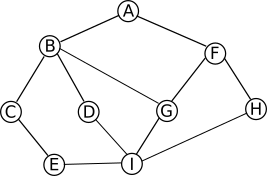

Le principe du parcours en largeur d'abord est de selectionner 
* un sommet de départ
* ensuite : les voisins du sommet de départ
* puis : les voisins de ces voisins
* etc... en évitant de "revenir en arrière"

#### Exemple
en partant du sommet A dans le graphe exemple, un parcours en largeur pourra être:


```
# distance 0 depuis A
A  
# distance 1 depuis A
B  F
# distance 2 depuis A
C  D  G  H 
# distance 3 depuis A
E  I
```

Remarque : l'ordre est arbitraire entre les sommets situés à la même distance de A !


#### Graphe Exemple en Python

In [ ]:
class Graphe:
    ''' graphe représenté par un dictionnaire d'adjacence'''
    def __init__(self):
        self.dico = {}
    
    def ajouter_sommet(self,s):
        if s not in self.dico:
            self.dico[s] = []
    
    def ajouter_arc(self,s1,s2):
        self.ajouter_sommet(s1)
        self.ajouter_sommet(s2)
        self.dico[s1].append(s2)
    
    def ajouter_arete(self,s1,s2):
        self.ajouter_sommet(s1)
        self.ajouter_sommet(s2)
        self.dico[s1].append(s2)
        self.dico[s2].append(s1)
    
    def arc(self,s1,s2):
        return s2 in self.dico[s1]
    
    def sommets(self):
        return list(self.dico)

    def voisins(self,s):
        return self.dico[s]
    
graphex = Graphe()
graphex.ajouter_arete('A','B')
graphex.ajouter_arete('A','F')
graphex.ajouter_arete('B','C')
graphex.ajouter_arete('B','D')
graphex.ajouter_arete('B','G')
graphex.ajouter_arete('F','G')
graphex.ajouter_arete('F','H')
graphex.ajouter_arete('C','E')
graphex.ajouter_arete('E','I')
graphex.ajouter_arete('D','I')
graphex.ajouter_arete('G','I')
graphex.ajouter_arete('H','I')



#### 1) Parcours en largeur (avec deux listes)

In [ ]:
def parcours_largeur(g,depart):
    '''parcours en largeur d'un graphe g depuis un sommet depart
    la fonction renvoie un dictionnaire avec
    - comme clés : les sommets accessibles depuis le sommet depart
    - comme valeurs : la distance au sommet depart'''
    dist = {depart:0}
    courant = [depart]  # liste des sommets à une distance 'n'
    suivant = []        # liste des sommets à une distance 'n+1'
    while len(courant)>0:
        s = courant.pop()  #on retire un sommet à la distance n
        # la liste 'courant' est utilisée comme une PILE
        for v in g.voisins(s): 
            if v not in dist:
                #  v (voisin de s) est inscrit dans le dictionnaire
                dist[v] = dist[s] + 1 
                # et on ajoute v dans 'suivant'
                suivant.append(v)
        # si on a épuisé tous les sommets de 'courant', 
        # on passe à la distance n+1
        if len(courant)==0:
            suivant.reverse()  # juste pour l'esthétique... on reverse la pile
            courant = suivant
            suivant = []
    return dist

print(parcours_largeur(graphex,'I'))

{'I': 0, 'E': 1, 'D': 1, 'G': 1, 'H': 1, 'C': 2, 'B': 2, 'F': 2, 'A': 3}


[visualiser sur PythonTutor](https://pythontutor.com/visualize.html#code=class%20Graphe%3A%0A%20%20%20%20'''%20graphe%20repr%C3%A9sent%C3%A9%20par%20un%20dictionnaire%20d'adjacence'''%0A%20%20%20%20def%20__init__%28self%29%3A%0A%20%20%20%20%20%20%20%20self.dico%20%3D%20%7B%7D%0A%20%20%20%20%0A%20%20%20%20def%20ajouter_sommet%28self,s%29%3A%0A%20%20%20%20%20%20%20%20if%20s%20not%20in%20self.dico%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20self.dico%5Bs%5D%20%3D%20%5B%5D%0A%20%20%20%20%0A%20%20%20%20def%20ajouter_arc%28self,s1,s2%29%3A%0A%20%20%20%20%20%20%20%20self.ajouter_sommet%28s1%29%0A%20%20%20%20%20%20%20%20self.ajouter_sommet%28s2%29%0A%20%20%20%20%20%20%20%20self.dico%5Bs1%5D.append%28s2%29%0A%20%20%20%20%0A%20%20%20%20def%20ajouter_arete%28self,s1,s2%29%3A%0A%20%20%20%20%20%20%20%20self.ajouter_sommet%28s1%29%0A%20%20%20%20%20%20%20%20self.ajouter_sommet%28s2%29%0A%20%20%20%20%20%20%20%20self.dico%5Bs1%5D.append%28s2%29%0A%20%20%20%20%20%20%20%20self.dico%5Bs2%5D.append%28s1%29%0A%20%20%20%20%0A%20%20%20%20def%20arc%28self,s1,s2%29%3A%0A%20%20%20%20%20%20%20%20return%20s2%20in%20self.dico%5Bs1%5D%0A%20%20%20%20%0A%20%20%20%20def%20sommets%28self%29%3A%0A%20%20%20%20%20%20%20%20return%20list%28self.dico%29%0A%0A%20%20%20%20def%20voisins%28self,s%29%3A%0A%20%20%20%20%20%20%20%20return%20self.dico%5Bs%5D%0A%20%20%20%20%0Agraphex%20%3D%20Graphe%28%29%0Agraphex.ajouter_arete%28'A','B'%29%0Agraphex.ajouter_arete%28'A','F'%29%0Agraphex.ajouter_arete%28'B','C'%29%0Agraphex.ajouter_arete%28'B','D'%29%0Agraphex.ajouter_arete%28'B','G'%29%0Agraphex.ajouter_arete%28'F','G'%29%0Agraphex.ajouter_arete%28'F','H'%29%0Agraphex.ajouter_arete%28'C','E'%29%0Agraphex.ajouter_arete%28'E','I'%29%0Agraphex.ajouter_arete%28'D','I'%29%0Agraphex.ajouter_arete%28'G','I'%29%0Agraphex.ajouter_arete%28'H','I'%29%0A%0Adef%20parcours_largeur%28g,depart%29%3A%0A%20%20%20%20'''parcours%20en%20largeur%20d'un%20graphe%20g%20depuis%20un%20sommet%20depart%0A%20%20%20%20la%20fonction%20renvoie%20un%20dictionnaire%20avec%0A%20%20%20%20-%20comme%20cl%C3%A9s%20%3A%20les%20sommets%20accessibles%20depuis%20le%20sommet%20depart%0A%20%20%20%20-%20comme%20valeurs%20%3A%20la%20distance%20au%20sommet%20depart'''%0A%20%20%20%20dist%20%3D%20%7Bdepart%3A0%7D%0A%20%20%20%20courant%20%3D%20%5Bdepart%5D%20%20%23%20liste%20des%20sommets%20%C3%A0%20une%20distance%20'n'%0A%20%20%20%20suivant%20%3D%20%5B%5D%20%20%20%20%20%20%20%20%23%20liste%20des%20sommets%20%C3%A0%20une%20distance%20'n%2B1'%0A%20%20%20%20while%20len%28courant%29%3E0%3A%0A%20%20%20%20%20%20%20%20s%20%3D%20courant.pop%28%29%20%20%23on%20retire%20un%20sommet%20%C3%A0%20la%20distance%20n%0A%20%20%20%20%20%20%20%20%23%20la%20liste%20'courant'%20est%20utilis%C3%A9e%20comme%20une%20PILE%0A%20%20%20%20%20%20%20%20for%20v%20in%20g.voisins%28s%29%3A%20%0A%20%20%20%20%20%20%20%20%20%20%20%20if%20v%20not%20in%20dist%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23%20%20v%20%28voisin%20de%20s%29%20est%20inscrit%20dans%20le%20dictionnaire%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20dist%5Bv%5D%20%3D%20dist%5Bs%5D%20%2B%201%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23%20et%20on%20ajoute%20v%20dans%20'suivant'%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20suivant.append%28v%29%0A%20%20%20%20%20%20%20%20%23%20si%20on%20a%20%C3%A9puis%C3%A9%20tous%20les%20sommets%20de%20'courant',%20%0A%20%20%20%20%20%20%20%20%23%20on%20passe%20%C3%A0%20la%20distance%20n%2B1%0A%20%20%20%20%20%20%20%20if%20len%28courant%29%3D%3D0%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20suivant.reverse%28%29%20%20%23%20juste%20pour%20l'esth%C3%A9tique...%20on%20reverse%20la%20pile%0A%20%20%20%20%20%20%20%20%20%20%20%20courant%20%3D%20suivant%0A%20%20%20%20%20%20%20%20%20%20%20%20suivant%20%3D%20%5B%5D%0A%20%20%20%20return%20dist%0A%0Aprint%28parcours_largeur%28graphex,'I'%29%29&cumulative=false&curInstr=171&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

On pourra cacher les variables `graphex, g, Graphe, parcours_largeur`  
et sélectionner uniquement les lignes : 53, 56, 58, 60, 63, 64, 65, 66

#### 2) Parcours en largeur (avec une file)

On rappelle que le module queue contient une classe Queue qu'il suffit d'importer avec la commande `from queue import Queue`

La documentation officielle de Python fournit les éléments suivants :
* `Queue()` crée une file vide
* `Queue.put(item)` : met item dans la file
* `Queue.get()` : retire et renvoie un élément de la file.
* `Queue.empty()` : Renvoie True si la file est vide, False sinon.

Notre algorithme de parcours en largeur peut donc s'écrire : 

In [ ]:
from queue import Queue

def parcours_largeur(g,depart):
    '''parcours en largeur d'un graphe g depuis un sommet depart
    la fonction renvoie un dictionnaire avec
    - comme clés : les sommets accessibles depuis depart
    - comme valeurs : la distance au sommet depart'''
    dist = {depart:0}
    file = Queue() #file vide
    file.put(depart)
    while not file.empty():
        s = file.get()  #on retire un sommet de la file
        for v in g.voisins(s): 
            if v not in dist:
                #  v (voisin de s) est inscrit dans le dictionnaire
                dist[v] = dist[s] + 1 
                # et on ajoute v dans la file
                file.put(v)
    return dist

print(parcours_largeur(graphex,'A'))

{'A': 0, 'B': 1, 'F': 1, 'C': 2, 'D': 2, 'G': 2, 'H': 2, 'E': 3, 'I': 3}


# Parcours en profondeur

On a déjà étudié le parcours préfixe, pour un arbre binaire. 

Dans le cas des graphes, un algorithme 'similaire' est appelé :  **parcours en profondeur d'abord**. 

## 1) Avec une fonction récursive

In [ ]:
def parcours_profondeur(g,s,visites=[]):
    '''parcours en profondeur d'un graphe 'g' depuis un sommet 's'
    la fonction renvoie une liste de sommets visités depuis 's' récursivement'''
    if s not in visites:
        visites.append(s)
        for v in g.voisins(s):
            visites = parcours_profondeur(g,v,visites)
    return visites

print(parcours_profondeur(graphex,'A'))

['A', 'B', 'C', 'E', 'I', 'D', 'G', 'F', 'H']


## 2) Avec une pile

In [ ]:
def parcours_profondeur_pile(g,depart):
    '''parcours en profondeur d'un graphe 'g' depuis un sommet 'depart'
    la fonction renvoie une liste des sommets parcourus'''
    pile = [depart]
    visites = []
    while len(pile)>0:
        s = pile.pop()  #on retire le sommet 's' en haut de la pile
        if s not in visites:
            visites.append(s)  #on "visite" le sommet 's'
            for v in g.voisins(s): 
                pile.append(v)  # et on ajoute ses voisins (encore à visiter) dans la pile
    return visites

print(parcours_profondeur_pile(graphex,'A'))

['A', 'F', 'H', 'I', 'G', 'B', 'D', 'C', 'E']


## Efficacité

Si n est le nombre de sommets du graphe et m le nombre d'arcs, on rappelle que la taille du graphe est (n+m)

On peut montrer que le coût d'un parcours en profondeur, ou d'un parcours en largeur est de l'ordre de (n+m), c'est à dire qu'il est proportionnel à la taille du graphe (dans le pire de cas). 

Remarque : si tous les sommets ne sont pas accessibles depuis le sommet de départ, le parcours est plus rapide! 


# Application : détecter un cycle dans un graphe

## 1) Cycle dans un graphe orienté : test depuis un sommet

* Un **cycle** est un cas particulier de chemin, qui est : 
   * **fermé** : c'est à dire que le sommet de départ est identique au sommet d'arrivée.
   * **et simple** : tous les arcs qui le composent  sont distincts.

Dans le cas d'un graphe orienté, on parle aussi de **circuit** pour désigner un cycle. 

On reprend l'exemple : `graphex1`


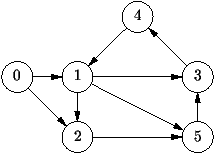


#### Combien ce graphe possède-t-il de cycles
* issus du sommet 1?
* issus du sommet 0?

**Réponse** : ce graphe contient plusieurs cycles issus du sommet 1 : 

* cycle de longueur 3: `1-3-4-1`
* cycle de longueur 4: `1-5-3-4-1`
* cycle de longueur 5: `1-2-5-3-4-1`

Ce graphe ne contient aucun cycle issus du sommet 0. 


In [ ]:
def cycle_depuis_sommet(g,depart):
    '''parcours en profondeur d'un graphe 'g' depuis un sommet 'depart'
    pour chercher un éventuel cycle 
    la fonction renvoie True s'il existe un cycle issu du sommet 'depart' 
    et False sinon '''
    # initialisation avec le sommet 'depart'
    visites = [depart]
    pile = []  
    for v in g.voisins(depart): 
        pile.append(v)  # on ajoute les voisins de 'depart' dans la pile
    while len(pile)>0:
        s = pile.pop()  #on retire le sommet 's' en haut de la pile
        if s==depart:
            return True
        if s not in visites:
            visites.append(s)  #on "visite" le sommet 's'
            for v in g.voisins(s): 
                pile.append(v)  # et on ajoute ses voisins (encore à visiter) dans la pile
    return False

#### définition du graphe : graphex1

In [ ]:
class Graphe:
    ''' graphe représenté par une matrice d'adjacence
    les sommets sont les entiers de 0 à n-1, avec n = ordre du graphe'''
    def __init__(self, n):
        self.n = n 
        self.tab = [ [0 for j in range(n)] for i in range(n)] 

    def ajouter_arc(self,s1,s2):
        self.tab[s1][s2] = 1

    def arc(self,s1,s2):
        return self.tab[s1][s2] == 1
    
    def voisins(self,s):
        return [j for j in range(self.n) if self.arc(s,j)]

    def sommets(self):
        return [i for i in range(self.n)]

    def afficher(self):
        for s in range(self.n):
            print(s, '->', end=' ')
            for v in self.voisins(s):
                print(v, end=' ')
            print()

graphex1 = Graphe(6)
graphex1.ajouter_arc(0,1)
graphex1.ajouter_arc(0,2)
graphex1.ajouter_arc(1,2)
graphex1.ajouter_arc(1,3)
graphex1.ajouter_arc(1,5)
graphex1.ajouter_arc(2,5)
graphex1.ajouter_arc(3,4)
graphex1.ajouter_arc(4,1)
graphex1.ajouter_arc(5,3)

#### test de la fonction

In [ ]:
assert cycle_depuis_sommet(graphex1,0)==False
assert cycle_depuis_sommet(graphex1,1)
print('test ok')

## 2) Présence d'un cycle dans un graphe orienté

Pour tester la présence d'un cycle dans un graphe orienté, on peut appeler la fonction cycle_depuis_sommet sur chacun des sommets du graphe, mais...

Cette méthode ne serait pas efficace, en particulier lorsque le graphe ne contient pas de cycle.

En effet, certains sommets seraient parcourus un grand nombre de fois : on va donc chercher à améliorer la détection de cycle en "colorant" les sommets du graphe. 

* initialement, chaque sommet aura la couleur "BLANC"
* un sommet recevra la couleur "NOIR" après la visite de tous ses voisins!
* un sommet aura la couleur "GRIS" lorsque
   * ce sommet a déjà été visité au moins une fois
   * les voisins de ce sommet n'ont pas tous été visités.

Exemples

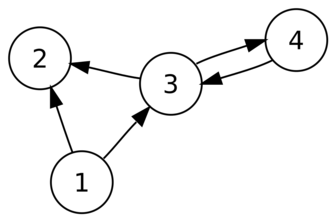

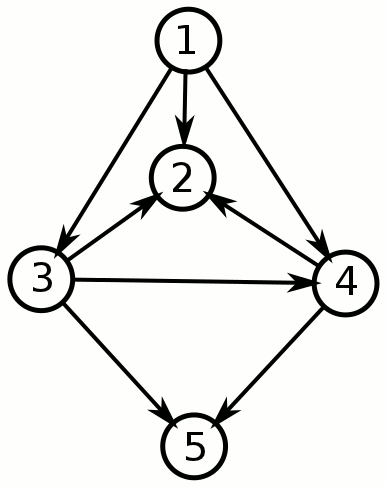

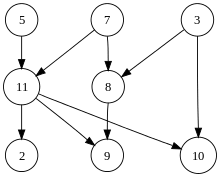

In [ ]:
BLANC = 1
GRIS = 2
NOIR = 3

def parcours_recherche_cycle(g, couleur, s):
    ''' parcours en profondeur du graphe g à partir du sommet s
    couleur est un dictionnaire dont les clés sont les sommets de g et les valeurs sont les couleurs
    la fonction renvoie True s'il existe un cycle passant par s '''
    if couleur[s]==NOIR:
        return False 
    if couleur[s]==GRIS:
        return True 
    #sinon, le sommet est BLANC : on le colore en GRIS, PUIS on explore ses voisins, PUIS on le colore en NOIR
    couleur[s]=GRIS
    for v in g.voisins(s):
        if parcours_recherche_cycle(g,couleur,v):
            return True 
    couleur[s]=NOIR 
    return False 

def existe_cycle(g):
    couleur = {}
    for s in g.sommets():
        couleur[s]=BLANC
    for s in g.sommets():
        if parcours_recherche_cycle(g,couleur,s):
            return True 
    return False 

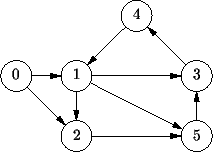

In [ ]:
existe_cycle(graphex1)

In [ ]:
graphe_sans_cycle = Graphe(6)
graphe_sans_cycle.ajouter_arc(1,2)
graphe_sans_cycle.ajouter_arc(1,3)
graphe_sans_cycle.ajouter_arc(1,4)
graphe_sans_cycle.ajouter_arc(3,2)
graphe_sans_cycle.ajouter_arc(3,4)
graphe_sans_cycle.ajouter_arc(3,5)
graphe_sans_cycle.ajouter_arc(4,5)

existe_cycle(graphe_sans_cycle)